# zadanie 1

In [11]:
println(Float16(1/3))
println(Float32(1/3))
println(Float64(1/3))

x = Float16(1/3)
y = Float64(x)
println("-------------------")
println(y)


0.3333
0.33333334
0.3333333333333333
-------------------
0.333251953125


# zadanie 2

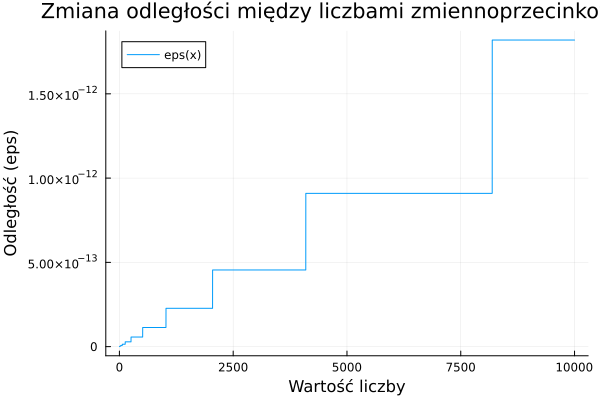

In [18]:

results = []

for i in 1:10000
    push!(results, eps(Float64(i)))
end

using Plots
plot(1:10000, results, xlabel="Wartość liczby", ylabel="Odległość (eps)", title="Zmiana odległości między liczbami zmiennoprzecinkowymi", label="eps(x)")



## zadanie 3

In [14]:
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))

numbers = []
for i in 1:50
    push!(numbers, Float32((0.1)^i))
end

for num in numbers
    println(decode(num), issubnormal(num))  
end


('0', "01111011", "10011001100110011001101")false
('0', "01111000", "01000111101011100001010")false
('0', "01110101", "00000110001001001101111")false
('0', "01110001", "10100011011011100010111")false
('0', "01101110", "01001111100010110101100")false
('0', "01101011", "00001100011011110111101")false
('0', "01100111", "10101101011111110010101")false
('0', "01100100", "01010111100110001110111")false
('0', "01100001", "00010010111000001011111")false
('0', "01011101", "10110111110011011111111")false
('0', "01011010", "01011111110101111111111")false
('0', "01010111", "00011001011110011001100")false
('0', "01010011", "11000010010111000010011")false
('0', "01010000", "01101000010010011011100")false
('0', "01001101", "00100000001110101111101")false
('0', "01001001", "11001101001010110010101")false
('0', "01000110", "01110000111011110101010")false
('0', "01000011", "00100111001001011101111")false
('0', "00111111", "11011000001111001001010")false
('0', "00111100", "01111001110010100001000")false


# zadanie 4 
Przykład algorytmu niestablilnego numerycznie obliczającego wartość liczby e^(-5.5) poprzez sumę szeregu Taylora

In [15]:
    function count_expencional(numberOfElements,x)
    result::Float16 = 0

    for i=0:numberOfElements

        result += (x^i)/factorial(big(i))


    end

    return result

    
end

count_expencional (generic function with 1 method)

In [16]:

println("przybliżenie policzone algorytmem niestabilnym numerycznie: ", count_expencional(40,-5.5))
println("prawdziwa wartość: ",exp(-5.5))
println("różnica: ", exp(-5.5) - count_expencional(40,-5.5))
println("błąd: ", (exp(-5.5) - count_expencional(40,-5.5))/exp(-5.5)," %")

przybliżenie policzone algorytmem niestabilnym numerycznie: 0.001228
prawdziwa wartość: 0.004086771438464067
różnica: 0.0028584389189328166
błąd: 0.6994369423329202 %


# Wersja Stabilna numerycznie uzyskana poprzez zamienienie odejmowania na dodawanie 

# $$ e^{-x} = \frac{1}{e^x} $$


In [17]:
function count_expencional_better(numberOfElements,x)
    result::Float16 = 0

    for i=0:numberOfElements

            result += (x^i)/factorial(big(i))

    end

    return 1/result
    
end

println("przybliżenie policzone algorytmem stabilnym numerycznie: ", count_expencional_better(30,5.5))
println("prawdziwa wartość: ",exp(-5.5))
println("różnica: ", exp(-5.5) - count_expencional_better(30,5.5))
println("błąd: ", (exp(-5.5) - count_expencional_better(40,5.5))/exp(-5.5)," %")

przybliżenie policzone algorytmem stabilnym numerycznie: 0.004086
prawdziwa wartość: 0.004086771438464067
różnica: 1.230666979691597e-6
błąd: 0.000301134281234509 %
